In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path + 'life_expectancy.csv'

In [3]:
life = pd.read_csv(file)
print(life.head(3))

       Country  Year      Status  Life expectancy  Adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

   Thinness 1-19 years  Thinness 5-9 years  Income composition of resources  \
0         

In [4]:
print('기대수명 데이터의 개요 : ')
print(life.describe())

기대수명 데이터의 개요 : 
              Year  Life expectancy  Adult mortality  Infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1

In [5]:
print('life 데이터의 칼럼들')
print(life.columns)

life 데이터의 칼럼들
Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


<AxesSubplot:>

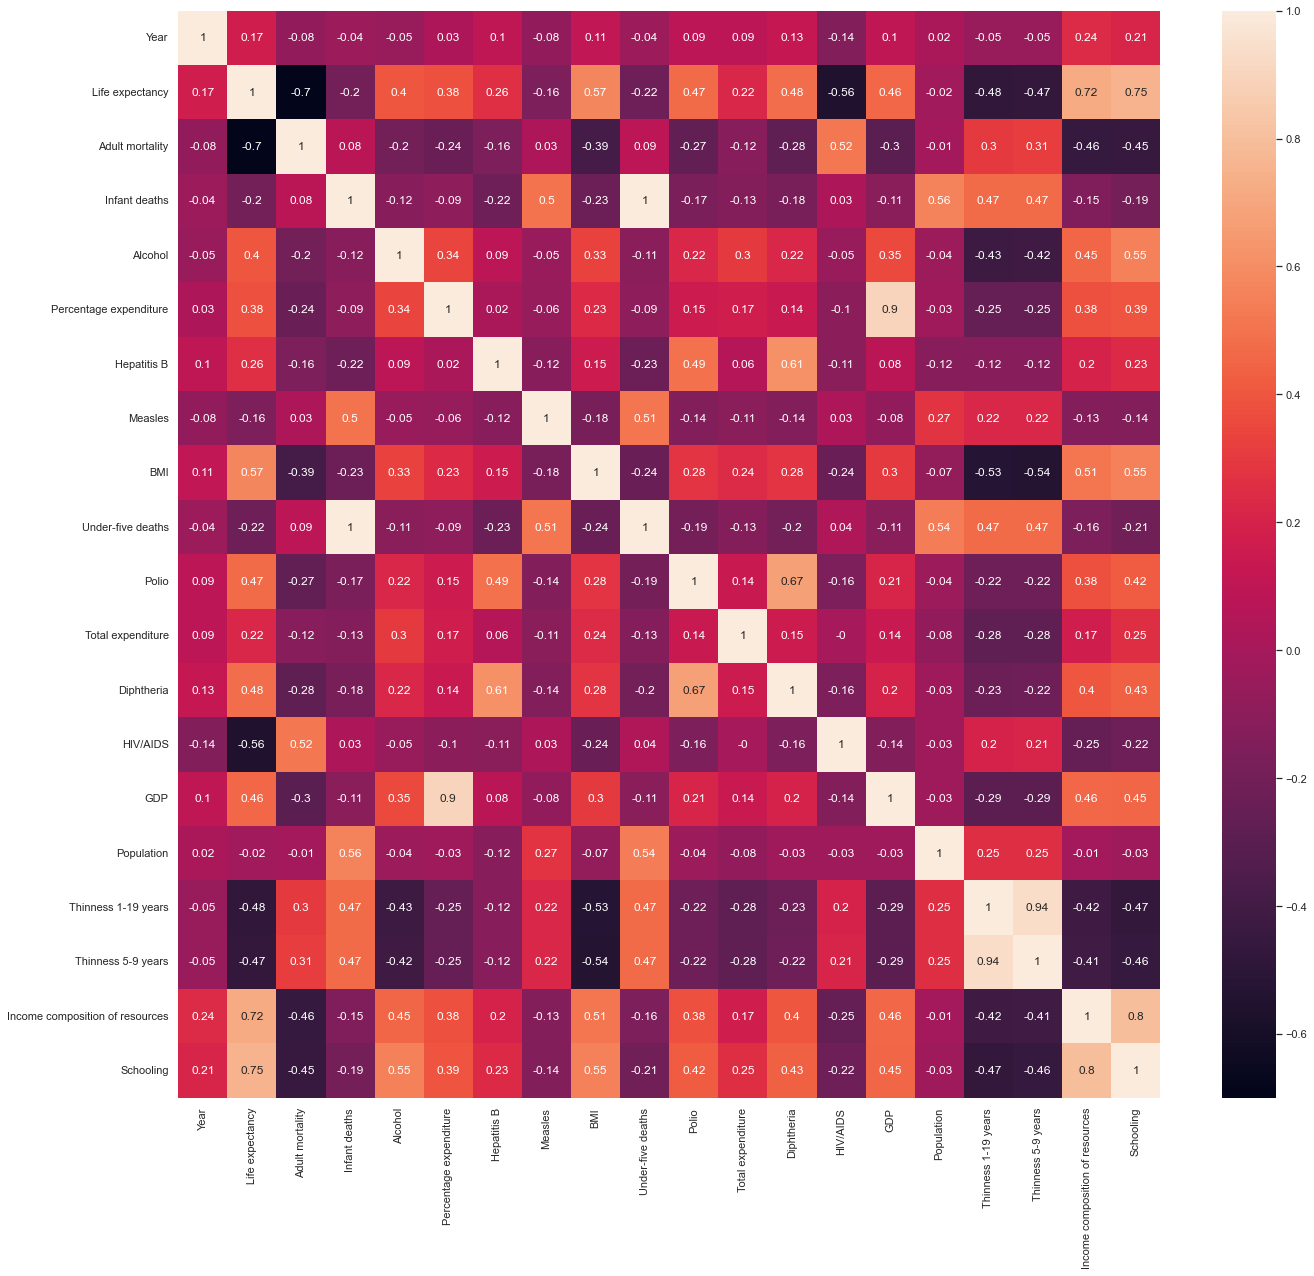

In [6]:
sns.set(rc = {'figure.figsize':(22,20)})
correlation_matrix = life.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

In [7]:
print('기대수명과의 상관계수')
print(life.corr().round(3)['Life expectancy'])

기대수명과의 상관계수
Year                               0.170
Life expectancy                    1.000
Adult mortality                   -0.696
Infant deaths                     -0.197
Alcohol                            0.405
Percentage expenditure             0.382
Hepatitis B                        0.257
Measles                           -0.158
BMI                                0.568
Under-five deaths                 -0.223
Polio                              0.466
Total expenditure                  0.218
Diphtheria                         0.479
HIV/AIDS                          -0.557
GDP                                0.461
Population                        -0.022
Thinness 1-19 years               -0.477
Thinness 5-9 years                -0.472
Income composition of resources    0.725
Schooling                          0.752
Name: Life expectancy, dtype: float64


In [8]:
c = life.corr().round(2)['Life expectancy']
c = np.abs(c)
print(c.sort_values(ascending = False)[1:8])

Schooling                          0.75
Income composition of resources    0.72
Adult mortality                    0.70
BMI                                0.57
HIV/AIDS                           0.56
Thinness 1-19 years                0.48
Diphtheria                         0.48
Name: Life expectancy, dtype: float64


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
life.dropna(inplace = True)

In [17]:
X = life[['Schooling', 'Income composition of resources',
         'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']]

y = life['Life expectancy']

In [18]:
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,random_state=5) 

In [19]:
regr = LinearRegression()
regr.fit(x_train, Y_train)

LinearRegression()

In [20]:
print('선형회귀 모델의 점수', regr.score(x_test, Y_test).round(3))

선형회귀 모델의 점수 0.804
